In [85]:
# <center>Предсказание цены велосипеда.</center>
## <center>Часть 1. Разведочный анализ данных</center>

Рассмотрим датасет велосипедов, который можно скачать [тут](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset).

Описание датасета:
The columns in the given dataset are as follows:

- name
- selling price
- year
- seller type
- owner
- km driven
- ex showroom price


Необходимо решить задачу классификации и научиться предсказывать целовой признак **?** выживет ли пассажир по его нецелевым признакам.

Сперва подключим необходимые библиотеки.

In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [87]:
df = pd.read_csv('./bike_details.csv')

In [88]:
df.count()

name                 1061
selling_price        1061
year                 1061
seller_type          1061
owner                1061
km_driven            1061
ex_showroom_price     626
dtype: int64

In [89]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Проверяем общее количество пропущенных значений.

In [90]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Признак **ex_showroom_price** и **Embarked** имеет пропущенные значения. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [91]:
df['selling_price'].value_counts()

25000    77
35000    66
50000    63
40000    63
30000    62
         ..
39000     1
83299     1
14700     1
19000     1
31000     1
Name: selling_price, Length: 130, dtype: int64

Признак selling_price -- количественный, поэтому используем для его анализа ящик с усами.

<AxesSubplot: xlabel='selling_price'>

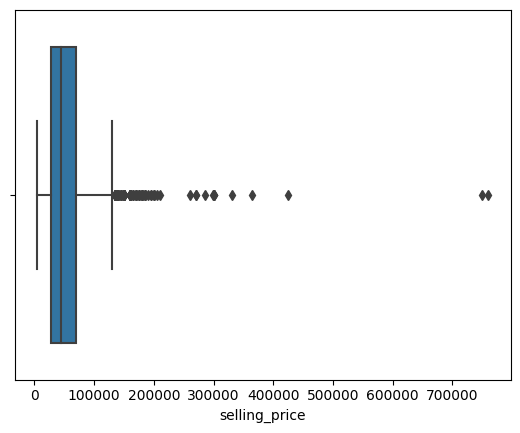

In [92]:
sns.boxplot(x=df['selling_price'])

Из графика видно, что у нас есть некоторые выбросы, которые мешают анализу. Уберем эти выбросы.

<AxesSubplot: xlabel='selling_price'>

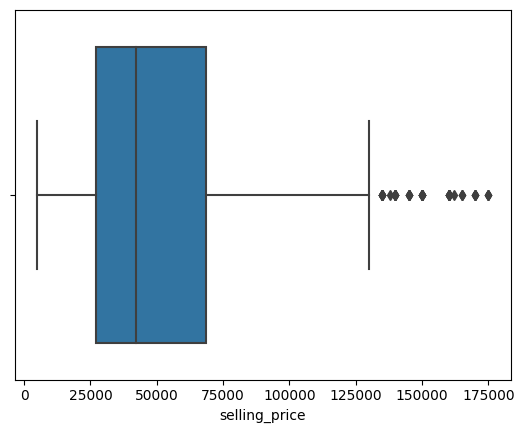

In [93]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
sns.boxplot(x=df_2['selling_price'])

Посмотрим, какое среднее значение цены было у велосипеда.

In [94]:
df['selling_price'].mean()

59638.1517

Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

Признак Name содержит слишком много уникальных значений, хотя в названии каждого велосипеда как правило присутствует бренд. На основе признака Name cформируем новый признак Brand, а признак Name выкинем. 

In [95]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [96]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [97]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

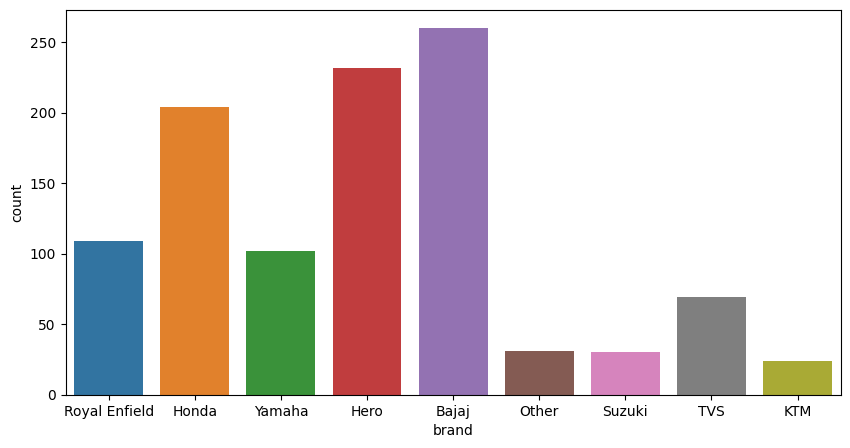

In [98]:
df['brand'] = df['name'].apply(lambda x: brand(x))
sns.countplot(x=df['brand'])
fig = plt.gcf()
fig.set_size_inches(10, 5)

Как видно, создание нового признака brand было уместным --- к категории Other относится совсем немного велосипедов. Удалим признак name.

In [99]:
df.drop(['name'],axis=1, inplace=True)

### Количественный признак Year

(array([  2.,   1.,   3.,  10.,   6.,  68., 116., 204., 298., 353.]),
 array([1988. , 1991.2, 1994.4, 1997.6, 2000.8, 2004. , 2007.2, 2010.4,
        2013.6, 2016.8, 2020. ]),
 <BarContainer object of 10 artists>)

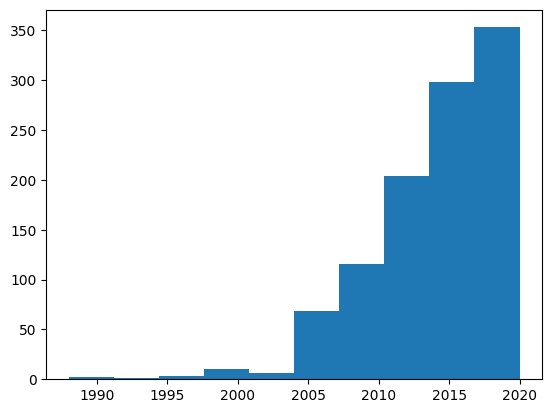

In [100]:
plt.hist(x=df['year'])

<AxesSubplot: xlabel='year'>

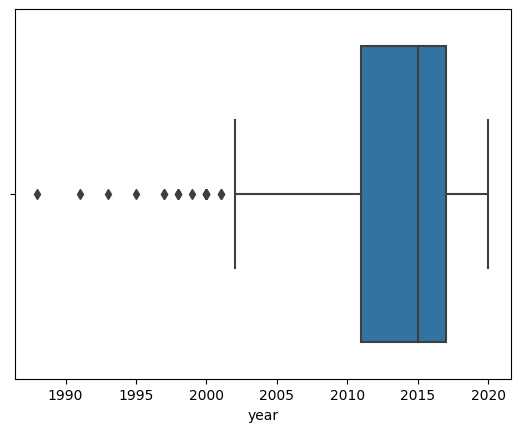

In [101]:
sns.boxplot(x=df['year'])

## Количественный признак km_driven

(array([1.022e+03, 2.900e+01, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.50000e+02, 8.83150e+04, 1.76280e+05, 2.64245e+05, 3.52210e+05,
        4.40175e+05, 5.28140e+05, 6.16105e+05, 7.04070e+05, 7.92035e+05,
        8.80000e+05]),
 <BarContainer object of 10 artists>)

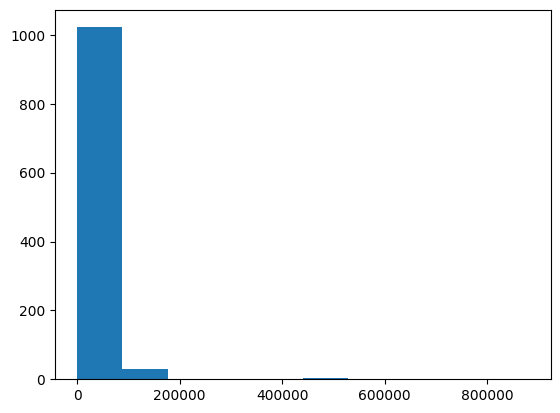

In [102]:
plt.hist(x=df['km_driven'])

Большинство велосипедов имеет пробег до 200000км.

### Категориальный признак seller_type

<AxesSubplot: xlabel='seller_type', ylabel='count'>

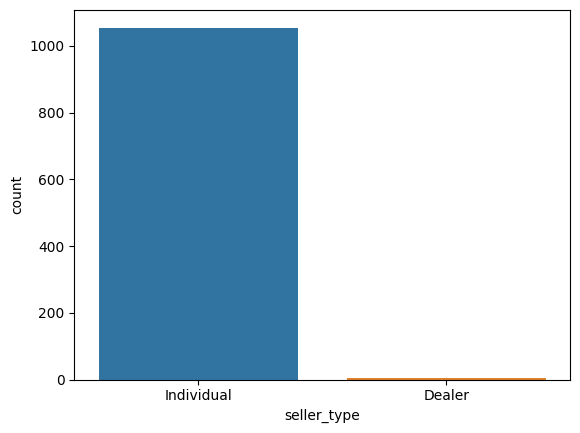

In [103]:
sns.countplot(x=df['seller_type'])

Большинство велосипедов продается частными лицами.

### Категориальный признак owner

<AxesSubplot: xlabel='owner', ylabel='count'>

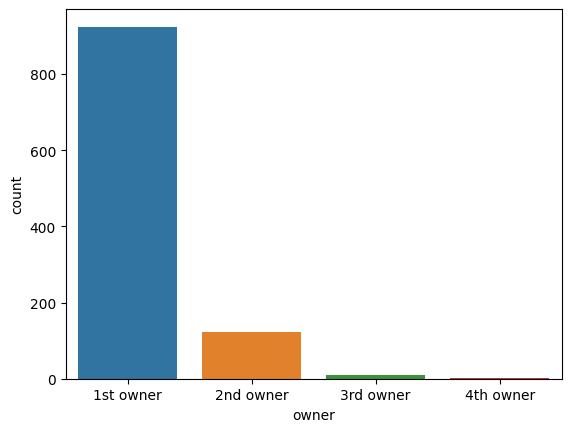

In [104]:
sns.countplot(x=df['owner'])

Большинство велосипедов имели только одного владельца.

### Двумерный анализ признаков

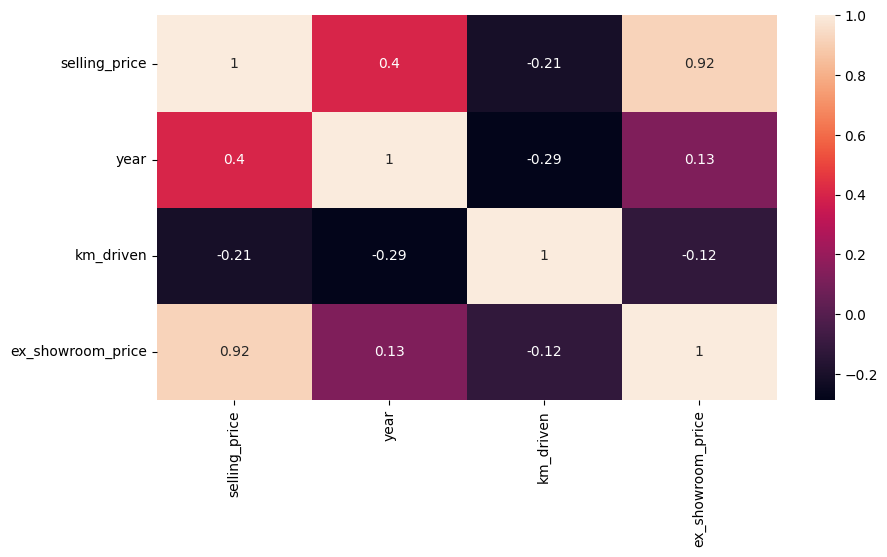

In [105]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Из карты признаков видна высокая корелляция признаков selling_price и ex_showroom_price. Так как признак ex_showroom_price имеет пропущенные значения, кажется целесообразным убрать его в процессе чистки.

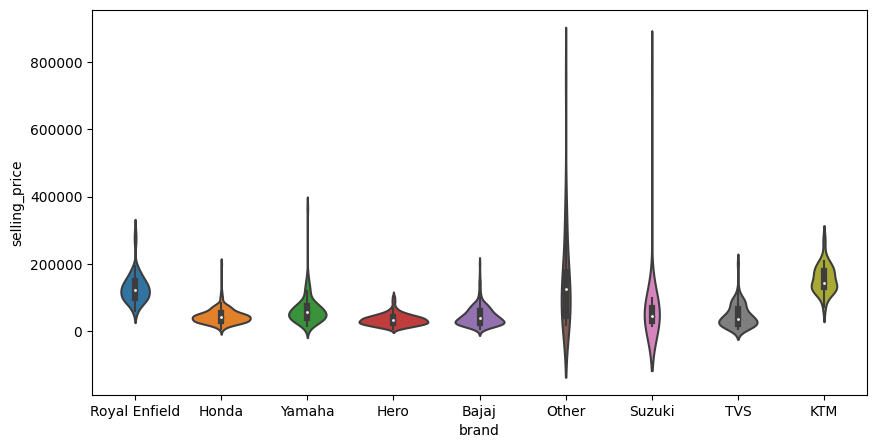

In [106]:
sns.violinplot(data=df,x="brand", y="selling_price", split=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)

Из графика с виолончелями можно сделать вывод, что наименьший разброс по цене имеют велосипеды марки Hero. При этом, например, велосипеды марки KTM в целом дороже велосипедов марки Hero.